Compare the steps of gradient descent, heavy ball method, and Nesterov method.

Assume a function:
$$ f(x) = \frac{1}{2} x^T \, A \, x + b^T \,x$$
Optimal solution
$$ A \, x + b = 0$$
Gradient step:
$$ x_{t+1} = (I - \alpha\, A) x_{t} - \alpha\, b$$

In [2]:
import numpy as np
from numpy import array as arr
import matplotlib.pyplot as pp
from operator import itemgetter
%matplotlib inline

In [3]:
A = arr([[1,0],[0,6]])
b = arr([0,0])
print(A)
print('Eigenvalues:', np.linalg.eig(A)[0])

[[1 0]
 [0 6]]
Eigenvalues: [1. 6.]


In [3]:
X,Y = np.meshgrid(np.linspace(-0.3,1,50),np.linspace(-1,1,50))

In [4]:
f = lambda x,y: 0.5 * np.dot(np.dot( (x,y), A), (x,y)) + np.dot(b,(x,y))
F = np.vectorize(f)

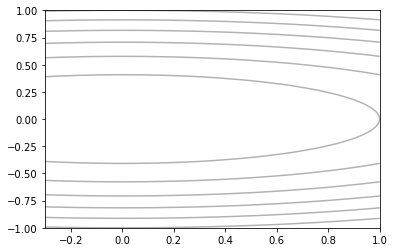

In [5]:
pp.contour(X,Y,F(X,Y),colors=['black'],alpha=0.3)
pp.show()

## Gradient Descent

In [6]:
def gradient_update(A,b):
    I = np.eye(A.shape[0])
    eigs = np.linalg.eig(A)[0]
    alpha = 2 / (np.min(eigs) + np.max(eigs))
    return (lambda x: (I - alpha*A).dot(x) - alpha * b)

In [7]:
x = np.ones(2)
g = gradient_update(A,b)
xs_g = [x]
for i in range(20):
    x = g(x)
    xs_g.append(x)

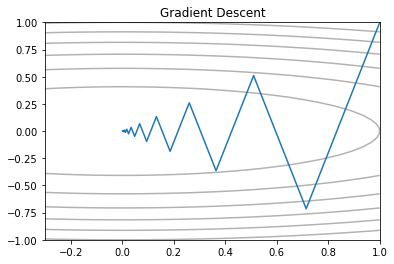

In [8]:
pp.contour(X,Y,F(X,Y),colors=['black'],alpha=0.3)
pp.plot(list(map(itemgetter(0),xs_g)),\
        list(map(itemgetter(1),xs_g)))
pp.title('Gradient Descent');

## Heavy Ball

In [9]:
def heavyball_update(A,b):
    """ The update function works on x_t and x_{t+1} simulataneously"""
    eigs = np.linalg.eig(A)[0]
    L = np.max(eigs)
    l = np.min(eigs)
    
    alpha = 4 / (L + l)**2
    beta = (np.sqrt(L) - np.sqrt(l)) / (np.sqrt(L) + np.sqrt(l))
    
    
    I = np.eye(A.shape[0])
    Z = np.zeros(A.shape)
    Q =  np.vstack((np.hstack(( (1+beta)*I - alpha * A, -beta * I )), \
                   np.hstack((           I ,                 Z   ))) )
    q = np.concatenate((alpha * b, np.zeros(b.shape)))
    
    return lambda x: Q.dot(x) + q

In [10]:
x = np.ones(4)
g = heavyball_update(A,b)
xs_h = [x]
for i in range(20):
    x = g(x)
    xs_h.append(x)

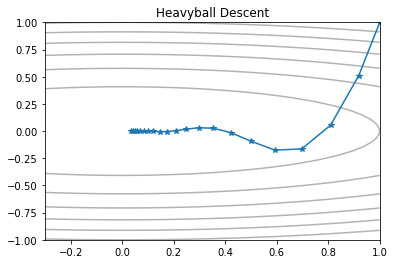

In [11]:
pp.contour(X,Y,F(X,Y),colors=['black'],alpha=0.3)
pp.plot(list(map(itemgetter(0),xs_h)),\
        list(map(itemgetter(1),xs_h)),'*-')
pp.title('Heavyball Descent');

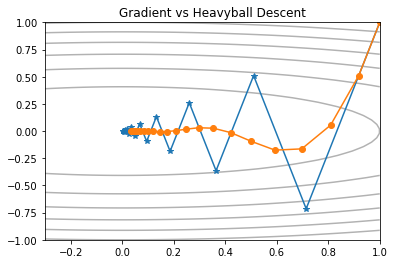

In [12]:
pp.contour(X,Y,F(X,Y),colors=['black'],alpha=0.3)
pp.plot(list(map(itemgetter(0),xs_g)),\
        list(map(itemgetter(1),xs_g)),'*-')
pp.plot(list(map(itemgetter(0),xs_h)),\
        list(map(itemgetter(1),xs_h)),'o-')
pp.title('Gradient vs Heavyball Descent');